# Clustering data with scipy

One strategy for dealing with large datasets is to cluster data and deal with
only a cluster at a time. The following example demonstrates the clustering of
a number of random points, adapted from
http://blog.mpacula.com/2011/04/27/k-means-clustering-example-python/

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans2

Generate 3 sets of normally distributed points around
 different means with different variances

In [3]:
pt1 = np.random.normal(1, 0.2, (100,2))
pt2 = np.random.normal(2, 0.5, (300,2))
pt3 = np.random.normal(3, 0.3, (100,2))

Slightly move sets 2 and 3 (for a prettier output)

In [4]:
pt2[:,0] += 1
pt3[:,0] -= 0.5

xy = np.concatenate((pt1, pt2, pt3))

Kmeans for 3 clusters

In [5]:
res, idx = kmeans2(np.array(list(zip(xy[:,0],xy[:,1]))),3)

colors = [([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1])[i] for i in idx]

Plot colored points

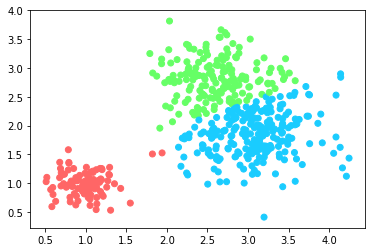

In [6]:
plt.scatter(xy[:,0],xy[:,1], c=colors);

Mark centroids as (X)

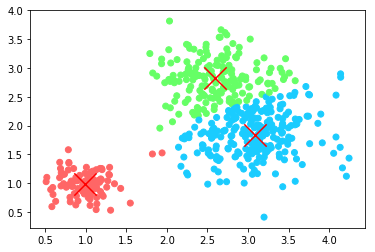

In [7]:
plt.scatter(xy[:,0],xy[:,1], c=colors);
plt.scatter(res[:,0],res[:,1], marker='o', s = 500, linewidths=2, c='none')
plt.scatter(res[:,0],res[:,1], marker='x', s = 500, linewidths=2, c='red')

plt.show()

## Clustering in colour space

Colour images are 3d arrays: height x width x (color channels). Often colour spaces have 3 colour channels (e.g. red, green, blue), or 4.

We will now use clustering to down-sample an image in colour space to its most representative (5, 20, etc.) colours.

In [8]:
balloon = plt.imread('data/hot-air-balloon1.jpg')

In [9]:
balloon.shape

(1932, 2576, 3)

In [10]:
balloon.ndim

3

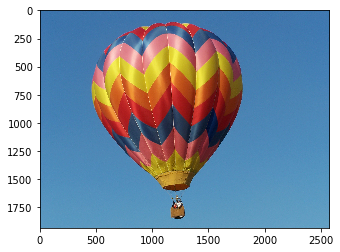

In [11]:
plt.imshow(balloon)

### Exercise:
- How many megapixels does this image have?
- Plot just the basket
- What is the data type?
- What is the range of intensity values (min and max)?

In [12]:
from scipy.cluster.vq import kmeans2

In [13]:
rows, cols, colours = balloon.shape

In [14]:
flat_balloon = np.reshape(balloon, (rows * cols, colours)).astype(float)
flat_balloon

array([[  60.,  112.,  170.],
       [  60.,  112.,  170.],
       [  60.,  112.,  170.],
       ..., 
       [ 100.,  160.,  197.],
       [ 101.,  161.,  198.],
       [ 102.,  162.,  199.]])

In [15]:
centroids, indices = kmeans2(flat_balloon, 10)

/Users/schofield/miniconda/envs/py36/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


#### "Fancy indexing"

In [16]:
new_balloon = centroids[indices]

In [17]:
new_balloon

array([[  67.54268686,  123.57444922,  174.92538499],
       [  67.54268686,  123.57444922,  174.92538499],
       [  67.54268686,  123.57444922,  174.92538499],
       ..., 
       [  85.07091968,  145.55080704,  188.21889014],
       [  85.07091968,  145.55080704,  188.21889014],
       [  85.07091968,  145.55080704,  188.21889014]])

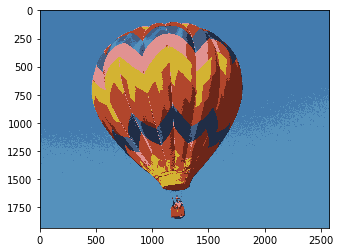

In [18]:
plt.imshow(np.reshape(new_balloon, (rows, cols, colours)).astype(np.uint8))

### Exercise: try this with 3 clusters, or 20

### More advanced clustering

K-Means is only one of several algorithms for clustering. Scikit-Learn provides more algorithms, including some (like DBScan) that can be used for outlier detection.